In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from soccerplots.radar_chart import Radar
from pandas_profiling import ProfileReport

#Importing data
defStats = pd.read_csv(r'C:\Users\Gamer Kyle\Desktop\datasets\FBREF\DEFRelative.csv')
defStats

,Player,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Lost,...,Clr,DefPen,Def3rdT,Mid3rdT,Att3rdT,AttPen,DeadBall,AerialDuel,Goals,xG
0,England,1.054688,0.934211,0.901639,1.240000,1.058824,0.928571,0.750000,1.237569,0.648649,...,0.662162,0.793258,0.978610,1.527604,1.657617,1.742857,1.053254,1.386635,2.600000,2.732143
1,France,0.883333,0.855422,0.476190,1.689655,2.428571,0.586957,0.553191,1.061350,0.520833,...,0.370629,0.421875,0.559322,1.676042,3.266234,4.441176,1.116438,1.747253,3.333333,3.827586
2,Germany,0.878261,0.684932,0.785714,0.849057,2.000000,0.568182,0.635294,0.893822,0.707317,...,0.754098,0.908451,1.111351,1.144444,1.648536,1.583333,1.037879,1.304147,5.000000,2.285714
3,Italy,1.419753,1.600000,1.888889,1.117647,0.818182,1.689655,1.437500,1.176600,1.228571,...,1.355556,1.323636,1.012232,0.809148,0.576876,0.516949,1.047445,1.178649,2.250000,1.253968
4,Netherlands,1.174194,1.187500,1.000000,1.407407,1.500000,1.028986,1.192000,0.864130,1.392857,...,0.942308,0.845966,1.067507,1.284516,1.555556,1.366337,1.000000,1.277904,2.200000,1.163043
5,Norway,0.915789,0.967742,0.980000,0.692308,1.833333,0.772727,0.865854,0.891993,0.973684,...,1.290698,1.445693,1.360656,0.940833,0.733922,0.753623,1.064885,0.953125,0.714286,0.594059
6,Sweden,0.735955,0.696429,0.489583,1.014925,1.066667,0.588235,0.587838,1.001742,0.587302,...,0.947712,0.776596,0.686441,0.980671,1.286682,1.480620,0.997429,0.960784,2.400000,1.650000
7,USA,0.653631,0.725490,0.462264,0.838710,1.454545,0.732143,0.669231,1.092807,0.621622,...,0.532609,0.596882,0.741160,1.336397,2.082192,3.578125,0.913265,1.309469,8.333333,4.809524
8,Avg,0.964451,0.956466,0.873035,1.106214,1.520015,0.861932,0.836363,1.027502,0.835104,...,0.856971,0.889045,0.939660,1.212457,1.600952,1.932878,1.028825,1.264746,3.353869,2.289505


In [16]:
#Generating EDA Report
profile = ProfileReport(defStats, title = "Defebsive Stats")
profile.to_file('Country Defensive Stats')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\Gamer Kyle\anaconda3\lib\site-packages\pandas_profiling\profile_report.py:314: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
#Outier Detection using the zscore filter. 

#Creates a purely numerical dataframe to operate on.
defStatsNum = defStats.drop(defStats.columns[0],axis=1)

#Applies a filter to detect all rows with a stat that has a z-score of over 3.
outlierFrame = defStatsNum[(np.abs(stats.zscore(defStatsNum)) > 3).any(axis=1)]
outlierFrame

,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Lost,Blocks,...,Clr,DefPen,Def3rdT,Mid3rdT,Att3rdT,AttPen,DeadBall,AerialDuel,Goals,xG


In [4]:
#Removing columns of data after further inspection manually done on the raw CSV.

##Note to self: run the setup line in block 1 first, else Tkl + Int would not be detected due to the fact it's removed already. 

#removing Tkl + Int
defStats = defStats.drop(['Tkl+Int'],axis=1)
#Removing age
defStats = defStats.drop(defStats.columns[1],axis=1)
#removing 90s
defStats = defStats.drop(defStats.columns[1],axis=1)

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


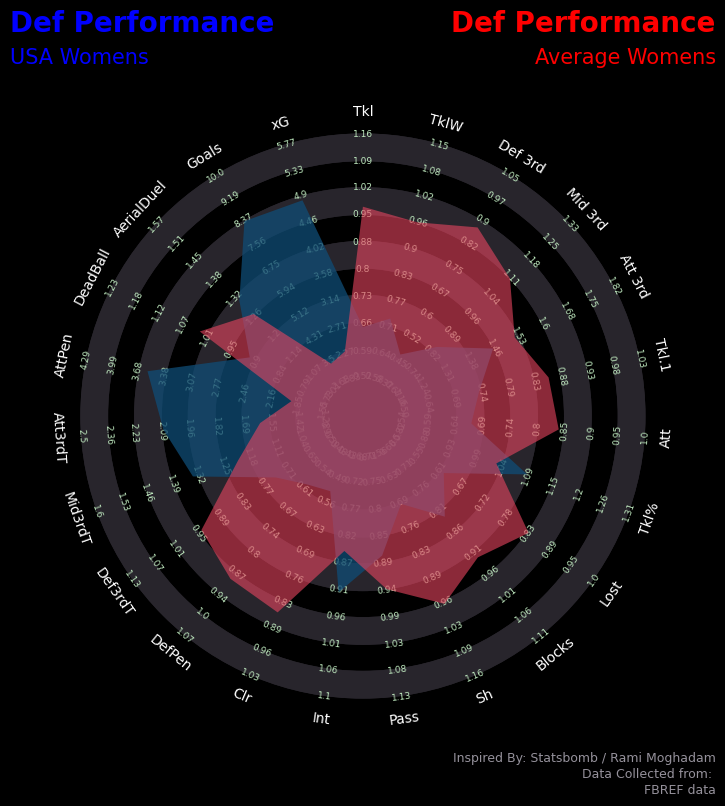

In [3]:
#Creating Radial Charts for each team for easy comparison. 

#USA

#Subsetting to only show USA details
USA = defStats[(defStats['Player'] == 'USA') | (defStats['Player'] == 'Avg')]

#Generating parameters/labels.
col_names = USA.columns.to_list()
myParam = col_names[1:]

#Generating range
myRange = []
for colnames in col_names[1:]:
    Min = min(USA[colnames])
    Max = max(USA[colnames])
    myRange.append((Min - 0.2*Min, Max + 0.2*Max))

#Generating input values
USAnum = USA.drop(USA.columns[0],axis=1)
myInputs = USAnum.values.tolist()

#Creating Labels
myLabel = dict(
    title_name = 'Def Performance',
    title_color = 'blue',
    subtitle_name = 'USA Womens',
    subtitle_color = 'blue',
    title_name_2 = 'Def Performance',
    title_color_2 = 'red',
    subtitle_name_2 = 'Average Womens',
    subtitle_color_2 = 'red'
)

#Creating footnote to credit datasource:
note = 'Data Collected from: \nFBREF data'

#Generating the radial chart:
radar = Radar(background_color="black", patch_color="#28252C", label_color="white", range_color="#BFE9BF")
fig, ax = radar.plot_radar(ranges = myRange, params = myParam, values = myInputs, alphas = [0.76, 0.6], 
                           title = myLabel, endnote = note, radar_color=['#0f4c75', '#e94560'], compare=True)


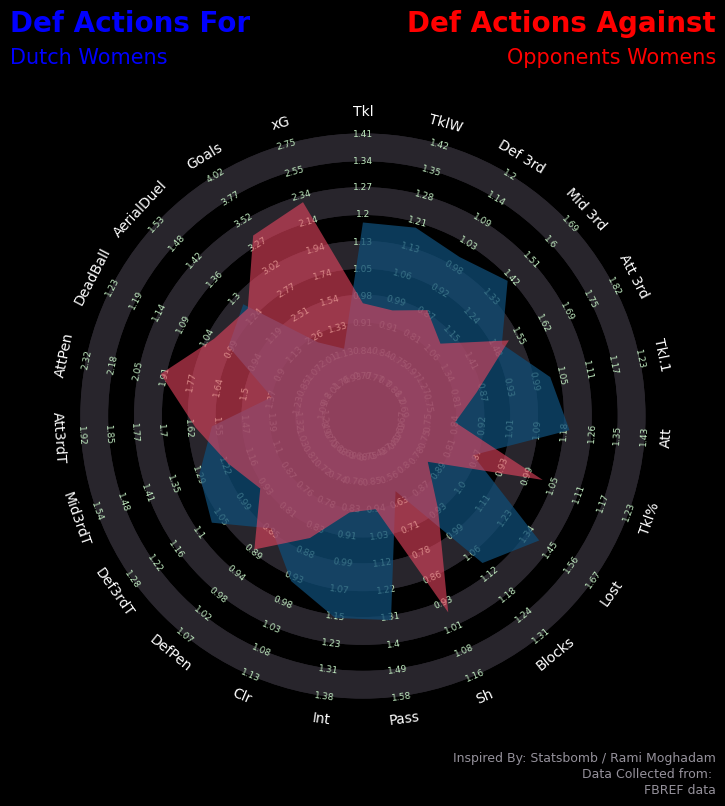

In [4]:
#Netherlands

#Subsetting to only show dutch details
NED = defStats[(defStats['Player'] == 'Netherlands') | (defStats['Player'] == 'Avg')]

#Generating parameters/labels.
col_names = NED.columns.to_list()
myParam = col_names[1:]

#Generating range
myRange = []
for colnames in col_names[1:]:
    Min = min(NED[colnames])
    Max = max(NED[colnames])
    myRange.append((Min - 0.2*Min, Max + 0.2*Max))

#Generating input values
NEDNum = NED.drop(NED.columns[0],axis=1)
myInputs = NEDNum.values.tolist()

#Creating Labels
myLabel = dict(
    title_name = 'Def Actions For',
    title_color = 'blue',
    subtitle_name = 'Dutch Womens',
    subtitle_color = 'blue',
    title_name_2 = 'Def Actions Against',
    title_color_2 = 'red',
    subtitle_name_2 = 'Opponents Womens',
    subtitle_color_2 = 'red'
)

#Creating footnote to credit datasource:
note = 'Data Collected from: \nFBREF data'

#Generating the radial chart:
radar = Radar(background_color="black", patch_color="#28252C", label_color="white", range_color="#BFE9BF")
fig, ax = radar.plot_radar(ranges = myRange, params = myParam, values = myInputs, alphas = [0.76, 0.6], 
                           title = myLabel, endnote = note, radar_color=['#0f4c75', '#e94560'], compare=True)

,Player,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Lost,...,Clr,DefPen,Def3rdT,Mid3rdT,Att3rdT,AttPen,DeadBall,AerialDuel,Goals,xG
6,Sweden,0.735955,0.696429,0.489583,1.014925,1.066667,0.588235,0.587838,1.001742,0.587302,...,0.947712,0.776596,0.686441,0.980671,1.286682,1.480620,0.997429,0.960784,2.400000,1.650000
8,Avg,0.964451,0.956466,0.873035,1.106214,1.520015,0.861932,0.836363,1.027502,0.835104,...,0.856971,0.889045,0.939660,1.212457,1.600952,1.932878,1.028825,1.264746,3.353869,2.289505


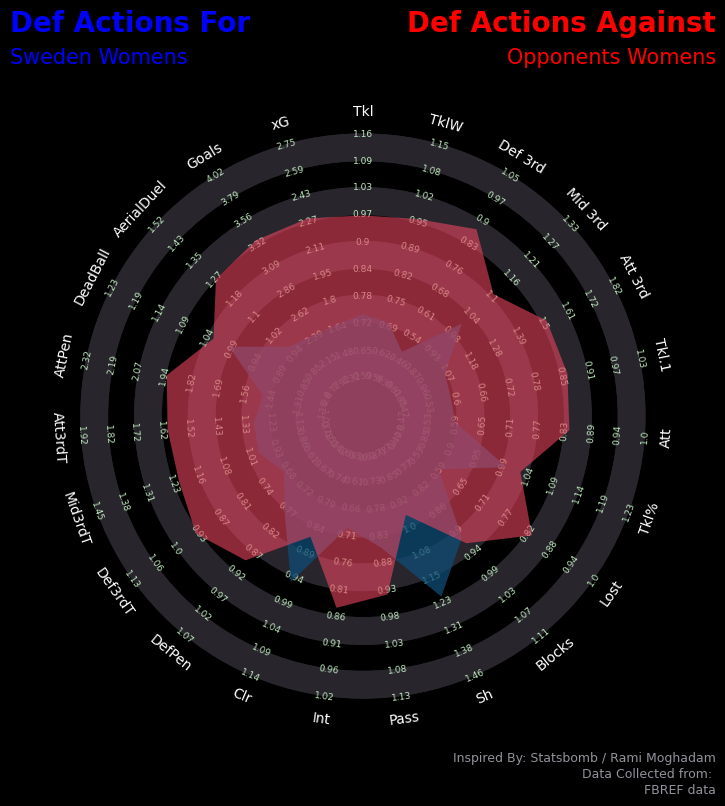

In [7]:
#Sweden

#Subsetting to only show dutch details
SWE = defStats[(defStats['Player'] == 'Sweden') | (defStats['Player'] == 'Avg')]

#Generating parameters/labels.
col_names = SWE.columns.to_list()
myParam = col_names[1:]

#Generating range
myRange = []
for colnames in col_names[1:]:
    Min = min(SWE[colnames])
    Max = max(SWE[colnames])
    myRange.append((Min - 0.2*Min, Max + 0.2*Max))

#Generating input values
SWENum = SWE.drop(SWE.columns[0],axis=1)
myInputs = SWENum.values.tolist()

#Creating Labels
myLabel = dict(
    title_name = 'Def Actions For',
    title_color = 'blue',
    subtitle_name = 'Sweden Womens',
    subtitle_color = 'blue',
    title_name_2 = 'Def Actions Against',
    title_color_2 = 'red',
    subtitle_name_2 = 'Opponents Womens',
    subtitle_color_2 = 'red'
)

#Creating footnote to credit datasource:
note = 'Data Collected from: \nFBREF data'

#Generating the radial chart:
radar = Radar(background_color="black", patch_color="#28252C", label_color="white", range_color="#BFE9BF")
fig, ax = radar.plot_radar(ranges = myRange, params = myParam, values = myInputs, alphas = [0.76, 0.6], 
                           title = myLabel, endnote = note, radar_color=['#0f4c75', '#e94560'], compare=True)

SWE

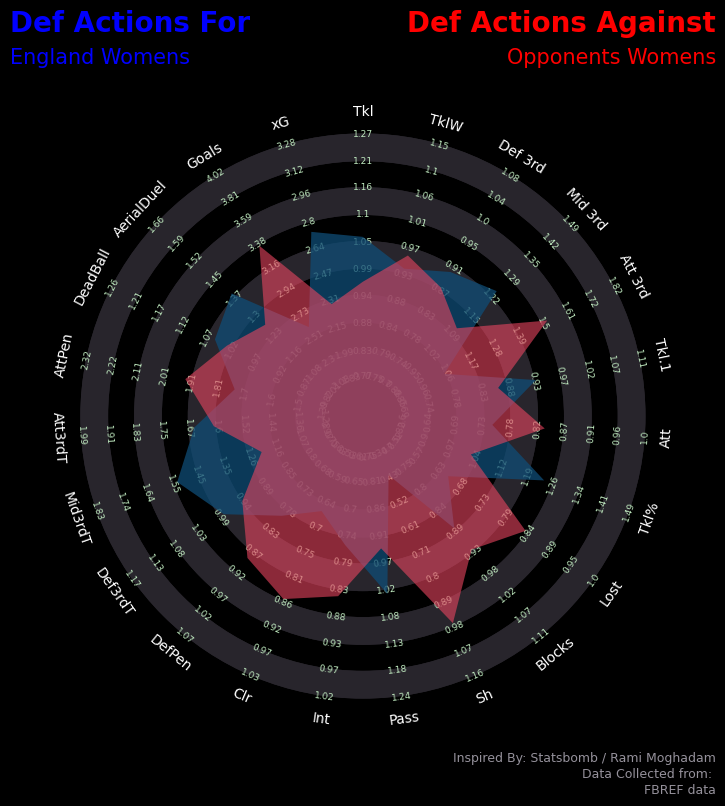

In [8]:
#England

#Subsetting to only show dutch details
ENG = defStats[(defStats['Player'] == 'England') | (defStats['Player'] == 'Avg')]

#Generating parameters/labels.
col_names = ENG.columns.to_list()
myParam = col_names[1:]

#Generating range
myRange = []
for colnames in col_names[1:]:
    Min = min(ENG[colnames])
    Max = max(ENG[colnames])
    myRange.append((Min - 0.2*Min, Max + 0.2*Max))

#Generating input values
ENGNum = ENG.drop(ENG.columns[0],axis=1)
myInputs = ENGNum.values.tolist()

#Creating Labels
myLabel = dict(
    title_name = 'Def Actions For',
    title_color = 'blue',
    subtitle_name = 'England Womens',
    subtitle_color = 'blue',
    title_name_2 = 'Def Actions Against',
    title_color_2 = 'red',
    subtitle_name_2 = 'Opponents Womens',
    subtitle_color_2 = 'red'
)

#Creating footnote to credit datasource:
note = 'Data Collected from: \nFBREF data'

#Generating the radial chart:
radar = Radar(background_color="black", patch_color="#28252C", label_color="white", range_color="#BFE9BF")
fig, ax = radar.plot_radar(ranges = myRange, params = myParam, values = myInputs, alphas = [0.76, 0.6], 
                           title = myLabel, endnote = note, radar_color=['#0f4c75', '#e94560'], compare=True)

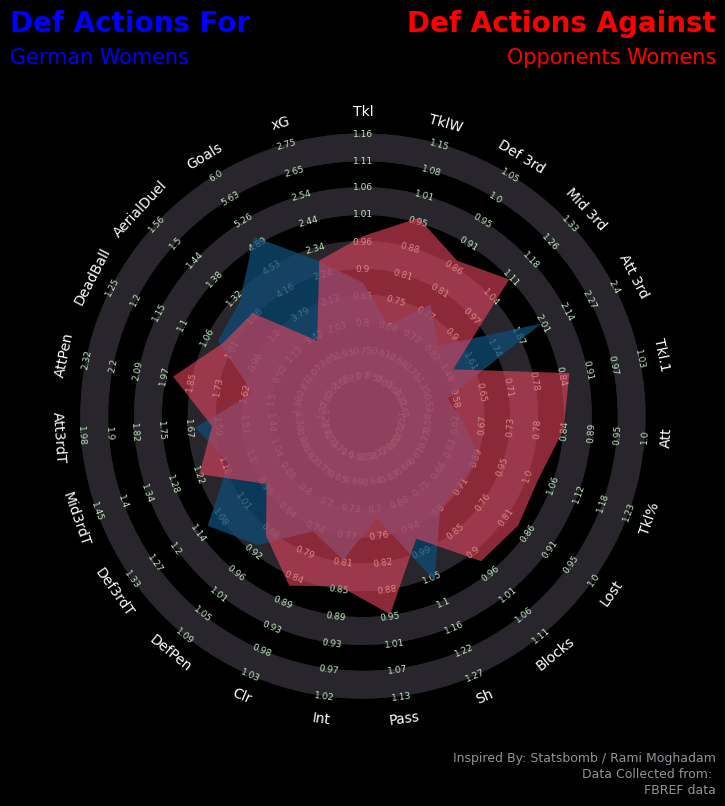

In [10]:
#Germany

#Subsetting to only show dutch details
GER = defStats[(defStats['Player'] == 'Germany') | (defStats['Player'] == 'Avg')]

#Generating parameters/labels.
col_names = GER.columns.to_list()
myParam = col_names[1:]

#Generating range
myRange = []
for colnames in col_names[1:]:
    Min = min(GER[colnames])
    Max = max(GER[colnames])
    myRange.append((Min - 0.2*Min, Max + 0.2*Max))

#Generating input values
GERNum = GER.drop(GER.columns[0],axis=1)
myInputs = GERNum.values.tolist()

#Creating Labels
myLabel = dict(
    title_name = 'Def Actions For',
    title_color = 'blue',
    subtitle_name = 'German Womens',
    subtitle_color = 'blue',
    title_name_2 = 'Def Actions Against',
    title_color_2 = 'red',
    subtitle_name_2 = 'Opponents Womens',
    subtitle_color_2 = 'red'
)

#Creating footnote to credit datasource:
note = 'Data Collected from: \nFBREF data'

#Generating the radial chart:
radar = Radar(background_color="black", patch_color="#28252C", label_color="white", range_color="#BFE9BF")
fig, ax = radar.plot_radar(ranges = myRange, params = myParam, values = myInputs, alphas = [0.76, 0.6], 
                           title = myLabel, endnote = note, radar_color=['#0f4c75', '#e94560'], compare=True)

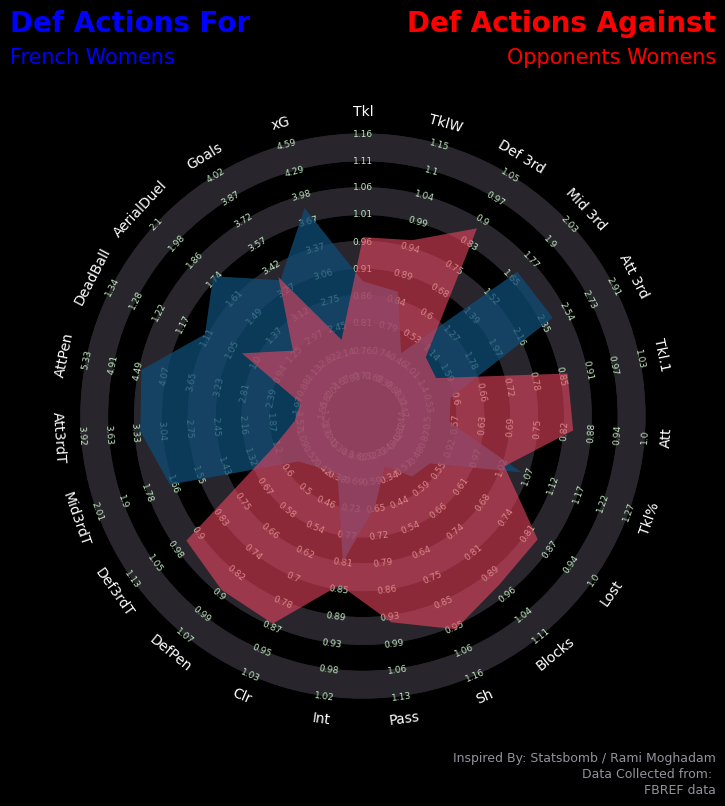

In [12]:
#France

#Subsetting to only show dutch details
FRA = defStats[(defStats['Player'] == 'France') | (defStats['Player'] == 'Avg')]

#Generating parameters/labels.
col_names = FRA.columns.to_list()
myParam = col_names[1:]

#Generating range
myRange = []
for colnames in col_names[1:]:
    Min = min(FRA[colnames])
    Max = max(FRA[colnames])
    myRange.append((Min - 0.2*Min, Max + 0.2*Max))

#Generating input values
FRANum = FRA.drop(FRA.columns[0],axis=1)
myInputs = FRANum.values.tolist()

#Creating Labels
myLabel = dict(
    title_name = 'Def Actions For',
    title_color = 'blue',
    subtitle_name = 'French Womens',
    subtitle_color = 'blue',
    title_name_2 = 'Def Actions Against',
    title_color_2 = 'red',
    subtitle_name_2 = 'Opponents Womens',
    subtitle_color_2 = 'red'
)

#Creating footnote to credit datasource:
note = 'Data Collected from: \nFBREF data'

#Generating the radial chart:
radar = Radar(background_color="black", patch_color="#28252C", label_color="white", range_color="#BFE9BF")
fig, ax = radar.plot_radar(ranges = myRange, params = myParam, values = myInputs, alphas = [0.76, 0.6], 
                           title = myLabel, endnote = note, radar_color=['#0f4c75', '#e94560'], compare=True)

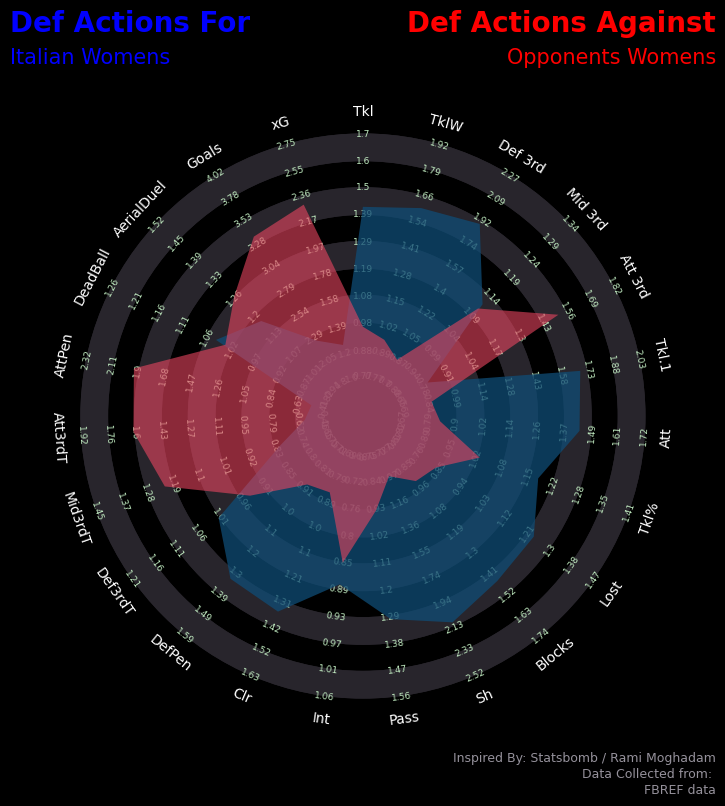

In [13]:
#Italy

#Subsetting to only show dutch details
ITA = defStats[(defStats['Player'] == 'Italy') | (defStats['Player'] == 'Avg')]

#Generating parameters/labels.
col_names = ITA.columns.to_list()
myParam = col_names[1:]

#Generating range
myRange = []
for colnames in col_names[1:]:
    Min = min(ITA[colnames])
    Max = max(ITA[colnames])
    myRange.append((Min - 0.2*Min, Max + 0.2*Max))

#Generating input values
ITANum = ITA.drop(ITA.columns[0],axis=1)
myInputs = ITANum.values.tolist()

#Creating Labels
myLabel = dict(
    title_name = 'Def Actions For',
    title_color = 'blue',
    subtitle_name = 'Italian Womens',
    subtitle_color = 'blue',
    title_name_2 = 'Def Actions Against',
    title_color_2 = 'red',
    subtitle_name_2 = 'Opponents Womens',
    subtitle_color_2 = 'red'
)

#Creating footnote to credit datasource:
note = 'Data Collected from: \nFBREF data'

#Generating the radial chart:
radar = Radar(background_color="black", patch_color="#28252C", label_color="white", range_color="#BFE9BF")
fig, ax = radar.plot_radar(ranges = myRange, params = myParam, values = myInputs, alphas = [0.76, 0.6], 
                           title = myLabel, endnote = note, radar_color=['#0f4c75', '#e94560'], compare=True)

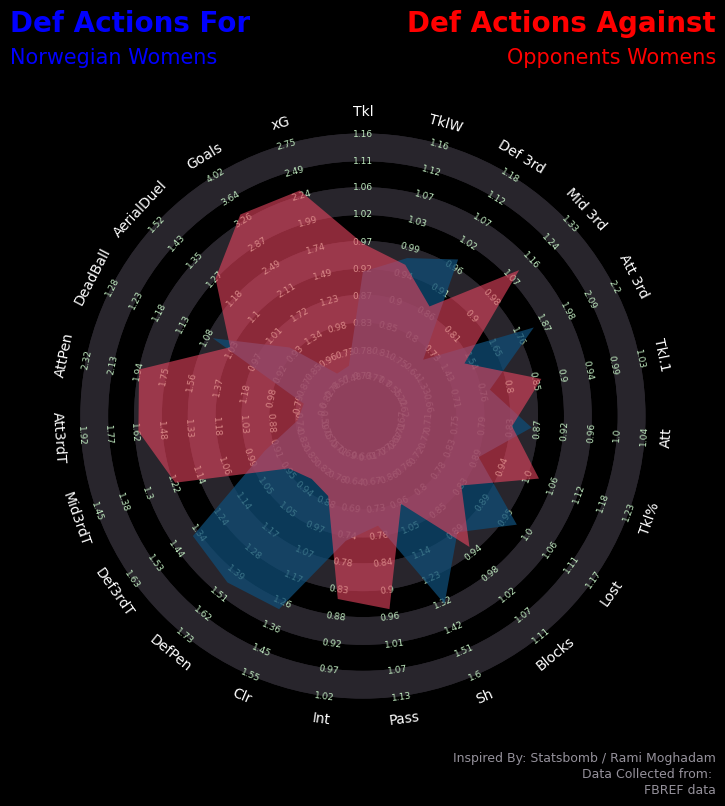

In [14]:
#Norway

#Subsetting to only show dutch details
NOR = defStats[(defStats['Player'] == 'Norway') | (defStats['Player'] == 'Avg')]

#Generating parameters/labels.
col_names = NOR.columns.to_list()
myParam = col_names[1:]

#Generating range
myRange = []
for colnames in col_names[1:]:
    Min = min(NOR[colnames])
    Max = max(NOR[colnames])
    myRange.append((Min - 0.2*Min, Max + 0.2*Max))

#Generating input values
NORNum = NOR.drop(NOR.columns[0],axis=1)
myInputs = NORNum.values.tolist()

#Creating Labels
myLabel = dict(
    title_name = 'Def Actions For',
    title_color = 'blue',
    subtitle_name = 'Norwegian Womens',
    subtitle_color = 'blue',
    title_name_2 = 'Def Actions Against',
    title_color_2 = 'red',
    subtitle_name_2 = 'Opponents Womens',
    subtitle_color_2 = 'red'
)

#Creating footnote to credit datasource:
note = 'Data Collected from: \nFBREF data'

#Generating the radial chart:
radar = Radar(background_color="black", patch_color="#28252C", label_color="white", range_color="#BFE9BF")
fig, ax = radar.plot_radar(ranges = myRange, params = myParam, values = myInputs, alphas = [0.76, 0.6], 
                           title = myLabel, endnote = note, radar_color=['#0f4c75', '#e94560'], compare=True)

In [15]:
#Average

#Subsetting to only show dutch details
AVG = defStats[(defStats['Player'] == 'Average') | (defStats['Player'] == 'Avg')]

#Generating parameters/labels.
col_names = AVG.columns.to_list()
myParam = col_names[1:]

#Generating range
myRange = []
for colnames in col_names[1:]:
    Min = min(AVG[colnames])
    Max = max(AVG[colnames])
    myRange.append((Min - 0.2*Min, Max + 0.2*Max))

#Generating input values
AVGNum = AVG.drop(AVG.columns[0],axis=1)
myInputs = AVGNum.values.tolist()

#Creating Labels
myLabel = dict(
    title_name = 'Def Actions For',
    title_color = 'blue',
    subtitle_name = 'Average Womens',
    subtitle_color = 'blue',
    title_name_2 = 'Def Actions Against',
    title_color_2 = 'red',
    subtitle_name_2 = 'Opponents Womens',
    subtitle_color_2 = 'red'
)

#Creating footnote to credit datasource:
note = 'Data Collected from: \nFBREF data'

#Generating the radial chart:
radar = Radar(background_color="black", patch_color="#28252C", label_color="white", range_color="#BFE9BF")
fig, ax = radar.plot_radar(ranges = myRange, params = myParam, values = myInputs, alphas = [0.76, 0.6], 
                           title = myLabel, endnote = note, radar_color=['#0f4c75', '#e94560'], compare=True)

AssertionError: Length for values, radar_color and alpha do not match

In [17]:
import scipy.stats as stats
stats.f_oneway(defStats['Def 3rd'][defStats['Player'] == 'England'],
               defStats['Def 3rd'][defStats['Player'] == 'Netherlands'],
               defStats['Def 3rd'][defStats['Player'] == 'Germany'],
               defStats['Def 3rd'][defStats['Player'] == 'France'],
              defStats['Def 3rd'][defStats['Player'] == 'Italy'],
              defStats['Def 3rd'][defStats['Player'] == 'Sweden'],
              defStats['Def 3rd'][defStats['Player'] == 'Norway'],
              defStats['Def 3rd'][defStats['Player'] == 'USA'])

C:\Users\Gamer Kyle\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3877: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


F_onewayResult(statistic=nan, pvalue=nan)